<a id='back_to_top'></a>
# Water Bottle Image Classification Dataset
"Classifying Water Bottle Images Based on Water Level Using Machine Learning"

**Created By**: Wuttipat S. <br>
**Created Date**: 2023-02-10 <br>
**Status**: <span style="color:green">Completed</span>

# Table of contents

### 1. [Introduction](#introduction)
- [Project Objective](#project_objective)
- [Dataset Description](#dataset_description)
- [About this directory](#about_this_directory) 

### 2. [Importing Data from the Directory](#load_dataset) 
### 3. [Data Preprocessing](#data_preprocessing) 
1. [Data Augmentation](#data_augmentation)
2. [Nomalizing images value](#nomalizing_images_value)
3. [Convert the labels into one-hot encoder array](#convert_the_labels_into_one_hot_encoder_array)

### 4. [Machine Learning Model](#machine_learning_model) 
### 5. [Hyperparameter Tuning](#hyperparameter_tuning)
- [GridSearchCV](#gridsearchcv)

##  [Note](#note)

<br><br><br>

---
<a id='introduction'></a>
# Introduction

<a id='project_objective'></a>
## Project Objective: 
The main objective of this project is to develop a machine learning model that can accurately classify water bottle images based on their water levels. The model will be trained on a dataset of water bottle images, with each image being labeled as Full water level, Half water level, or Overflowing. The goal is to develop a model that can accurately classify a given water bottle image based on its water level.

<a id='dataset_description'></a>
## Dataset Description: 
The dataset consists of water bottle images that have been classified based on the level of water inside the bottle. There are three categories of images: Full water level, Half water level, and Overflowing. Each category contains a number of images of water bottles with the corresponding water level. The purpose of the dataset is to be used for an image classification problem, where a machine learning model is trained to classify the water level of a given water bottle image.

The dataset is intended to be used for training and testing a machine learning model for image classification. The model will be trained on the provided images, with each image being labeled as either Full water level, Half water level, or Overflowing. The goal of the model is to accurately classify a given water bottle image based on its water level.

The dataset consists of a number of water bottle images, each of which has been classified based on the water level inside the bottle. The images in the Full water level category show water bottles with the maximum possible amount of water inside, while the images in the Half water level category show water bottles with roughly half the maximum amount of water inside. The images in the Overflowing category show water bottles with more water inside than the maximum capacity of the bottle, resulting in water spilling out.

The dataset is likely to be useful for a variety of applications, such as developing automated systems for monitoring and managing water levels in containers or for use in a general image classification problem. The dataset may also be useful for research purposes, as it allows for the development and testing of machine learning models for image classification tasks.

<a id='about_this_directory'></a>
### About this directory
"This folder contains 308 images of water bottles with full water levels. The images show a variety of water bottle sizes and shapes, and are captured from a range of angles. The water bottles are made of plastic and are in good condition. These images could be useful for training a machine learning model to recognize full water levels in water bottles."
#### The dataset contains with 3 folder:
1. Full Water Level - 308 images of full water bottle
2. Half water lavel - 139 images of half water bottle
3. Overflowing - 39 images of overflowing bottle

---
<a id='load_dataset'></a>
## Importing Data from the Directory
We will start by importing the data from the directory. We will use the OS module in python to access the directory and its sub-directories. We will then use the OpenCV library to read the image files and convert them into arrays that can be processed by the machine learning model.

In [1]:
import os
import cv2
import numpy as np

import warnings
warnings.filterwarnings('ignore') # Hide all warnings


data = []
labels = []

# Access the directory and sub-directories and so on
directory = "/kaggle/input/water-bottle-dataset"

for sub_folder in os.listdir(directory):
    sub_folder_path = os.path.join(directory, sub_folder)
    for sub_sub_folder in os.listdir(sub_folder_path):
        sub_sub_folder_path = os.path.join(sub_folder_path, sub_sub_folder)
        for image_file in os.listdir(sub_sub_folder_path):
            if image_file.endswith(".jpeg"):
                image_path = os.path.join(sub_sub_folder_path, image_file)
                # Read the image using OpenCV
                image = cv2.imread(image_path) #the decoded images stored in **B G R** order.
                # Resize the image to a standard size
                image = cv2.resize(image, (128, 128))
                # Append the image to the data list
                data.append(image)
                # Append the label to the labels list
                labels.append(sub_folder)

# Convert the data and labels lists into numpy arrays
data = np.array(data)
labels = np.array(labels)


In [2]:
print(f'data shape:{data.shape}')
print(f'labels:{labels.shape}')

data shape:(429, 128, 128, 3)
labels:(429,)


---
<a id='data_preprocessing'></a>
## Cleaning and Data Preprocessing
Now that we have imported the data, we need to clean and preprocess the data so that it can be used to train the machine learning model. The following preprocessing steps will be performed:

1. Generate augmented data. The augmented data is concatenated with the original data to increase the size of the training data.
2. Normalizing the pixel values to a range between 0 and 1
3. Converting the labels into one-hot encoded arrays

<a id='data_augmentation'></a>
#### 1. Data Augmentation

In [3]:
# Generate augmented data

from keras.preprocessing.image import ImageDataGenerator

# Load the data
X = data # array of preprocessed data
y = labels # array of labels

# Create data generator
datagen = ImageDataGenerator(
        rotation_range=0,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

# Fit the data generator on the data
datagen.fit(X)

# Generate augmented data
X_augmented, y_augmented = [], []
for X_batch, y_batch in datagen.flow(X, y, batch_size=32):
    X_augmented.append(X_batch)
    y_augmented.append(y_batch)
    if len(X_augmented) >= 100: # Generate 100 augmented data
        break

# Concatenate augmented data with original data
data = np.concatenate((X, np.concatenate(X_augmented)))
labels = np.concatenate((y, np.concatenate(y_augmented)))

print(f"data augmented shape : {data.shape}")
print(f"labels augmented shape : {labels.shape}")

data augmented shape : (3496, 128, 128, 3)
labels augmented shape : (3496,)


<a id='nomalizing_images_value'></a>
#### 2. Nomalizing images value

In [4]:
# Normalize the pixel values to a range between 0 and 1
data = data / 255.0


# Preprocess the input data
#data = np.reshape(data, (data.shape[0], 224, 224, 3)) # Reshape image pixel values into specific value

<a id='convert_the_labels_into_one_hot_encoder_array'></a>
#### 3. Convert the labels into one-hot encoder array

In [5]:
labels = labels
# Convert the labels into one-hot encoded arrays
labels_one_hot = np.zeros((labels.shape[0], 3))

for i, label in enumerate(labels):
    if label == "Full  Water level":
        labels_one_hot[i, 0] = 1
    elif label == "Half Water Level":
        labels_one_hot[i, 1] = 1
    else:
        labels_one_hot[i, 2] = 1

<br>
Show a sample of images from the dataset

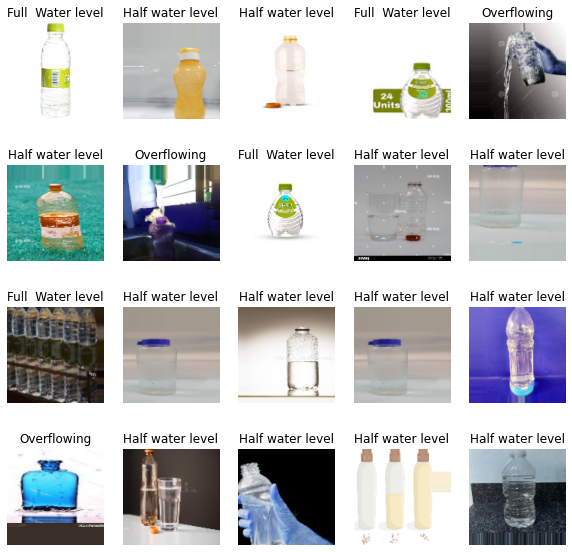

In [6]:
import matplotlib.pyplot as plt

# Load the data
data = data

# choose 20 random indices
indices = np.random.randint(0, len(data), 20)

# Get 20 sample images
sample_images = data[indices]

# Plot the images
fig = plt.figure(figsize=(10,10))
for i, img in enumerate(sample_images):
    plt.subplot(4, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(labels[indices[i]])
    
plt.show()

###### Generate augmented images files

```
# Save augmented images to specific directory --- Uncomment to use
# create new directory to save augmented images
import os

# Check existing directory, if not: crate new directory
if not os.path.exists("augmented_images"):
    os.makedirs("augmented_images")

augmented_data = data
labels = labels
# loop through each image in the augmented data
for i, image in enumerate(augmented_data):
    # convert the image back to its original form
    image = (image).astype("uint8")
    
    # save the image to the new directory
    cv2.imwrite(f"augmented_images/augmented_{labels[i]}_{i}.jpeg", image)
```

---
<a id='machine_learning_model'></a>
## Machine Learning Model
Finally, we will build, train, and evaluate machine learning models for the image classification problem. We will use the Keras library in Python to build and train the models.

In [7]:
import tensorflow as tf
from tensorflow import keras

# set seed value for randomization
# np.random.seed(42)
tf.random.set_seed(42)

# Build the model using a Convolutional Neural Network
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

# set an early stopping mechanism
# set patience to be tolerant against random validation loss increases
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
# history = model.fit(data, labels_one_hot, batch_size=32, epochs=10, validation_split=0.2)
history = model.fit(x=data,
                    y=labels_one_hot,
                    batch_size=256,
                    epochs=50,
                    validation_split=0.2,
                    callbacks=[early_stopping])

# Evaluate the model
print("Test accuracy: ", max(history.history['val_accuracy']))

2023-02-13 15:10:54.679451: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-13 15:10:54.774771: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-13 15:10:54.776364: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-13 15:10:54.778764: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/50


2023-02-13 15:11:00.039166: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


11/11 [==============================] - 10s 209ms/step - loss: 0.9225 - accuracy: 0.5558 - val_loss: 0.6674 - val_accuracy: 0.6086
Epoch 2/50
11/11 [==============================] - 1s 82ms/step - loss: 0.6324 - accuracy: 0.6470 - val_loss: 0.6390 - val_accuracy: 0.6986
Epoch 3/50
11/11 [==============================] - 1s 82ms/step - loss: 0.6089 - accuracy: 0.6677 - val_loss: 0.5870 - val_accuracy: 0.6843
Epoch 4/50
11/11 [==============================] - 1s 83ms/step - loss: 0.5507 - accuracy: 0.7039 - val_loss: 0.6260 - val_accuracy: 0.7043
Epoch 5/50
11/11 [==============================] - 1s 83ms/step - loss: 0.5367 - accuracy: 0.7318 - val_loss: 0.5284 - val_accuracy: 0.7300
Epoch 6/50
11/11 [==============================] - 1s 82ms/step - loss: 0.5011 - accuracy: 0.7282 - val_loss: 0.5104 - val_accuracy: 0.7286
Epoch 7/50
11/11 [==============================] - 1s 81ms/step - loss: 0.4624 - accuracy: 0.7718 - val_loss: 0.4938 - val_accuracy: 0.7729
Epoch 8/50
11/11 [====

##### Plot evalution results

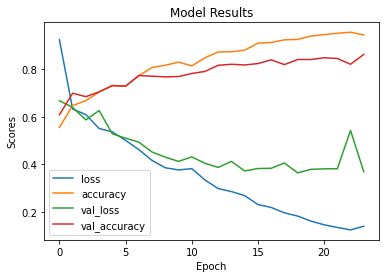

In [8]:
import matplotlib.pyplot as plt

results =  history.history
# Plot the accuracy history
# plot each line in the dictionary
for key in results:
    plt.plot(results[key], label=key)
    
plt.title('Model Results')
plt.ylabel('Scores')
plt.xlabel('Epoch')
plt.legend(list(results.keys()))
plt.show()

---
<a id='hyperparameter_tuning'></a>
## 5. Hyperparameter Tuning

<a id='gridsearchcv'></a>
##### GridSearchCV

In [9]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow as tf
from keras.callbacks import EarlyStopping


import warnings
warnings.filterwarnings('ignore') # Hide all warnings


tf.random.set_seed(42)
batch_size = [256, 512]
epochs = [25]
optimizer = ['adam', 'rmsprop']
# optimizer = ['adam', 'rmsprop']
cv = 5 # None mean default (K-fold=5)

# Define early stopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=5)


def create_model(optimizer):
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


model = KerasClassifier(build_fn=create_model)

param_grid = {'batch_size': batch_size,
              'epochs': epochs,
              'optimizer': optimizer,}
#               'callbacks': [early_stopping]}


grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv) 
grid_result = grid.fit(data, labels_one_hot, verbose=0)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

2/2 [==============================] - 0s 24ms/step - loss: 0.4474 - accuracy: 0.7668
Best: 0.858970 using {'batch_size': 256, 'epochs': 25, 'optimizer': 'adam'}
0.858970 (0.025277) with: {'batch_size': 256, 'epochs': 25, 'optimizer': 'adam'}
0.842960 (0.029770) with: {'batch_size': 256, 'epochs': 25, 'optimizer': 'rmsprop'}
0.839530 (0.009515) with: {'batch_size': 512, 'epochs': 25, 'optimizer': 'adam'}
0.747162 (0.042847) with: {'batch_size': 512, 'epochs': 25, 'optimizer': 'rmsprop'}


In [10]:
import pandas as pd
print(pd.DataFrame(grid_result.cv_results_))

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      21.273746      1.161848         0.593641        0.104966   
1      21.459218      1.165971         0.555407        0.013985   
2      20.551794      1.437958         0.632484        0.065877   
3      21.175503      1.466471         0.564186        0.011790   

  param_batch_size param_epochs param_optimizer  \
0              256           25            adam   
1              256           25         rmsprop   
2              512           25            adam   
3              512           25         rmsprop   

                                              params  split0_test_score  \
0  {'batch_size': 256, 'epochs': 25, 'optimizer':...           0.900000   
1  {'batch_size': 256, 'epochs': 25, 'optimizer':...           0.854286   
2  {'batch_size': 512, 'epochs': 25, 'optimizer':...           0.841429   
3  {'batch_size': 512, 'epochs': 25, 'optimizer':...           0.670000   

   split1_test_score  split2_tes

<a id='note'></a>
# Note
#### Improving a machine learning model can be achieved by using various techniques such as:

1. **Feature Engineering**: Adding or modifying the features used in the model to better capture the underlying patterns in the data.

2. **Model Selection**: Choosing a different machine learning model that is more suitable for the data and the problem being solved.

3. **Hyperparameter Tuning**✅: Adjusting the parameters of the machine learning model to improve its performance. This can be done manually or using techniques such as grid search or random search.

4. **Ensemble Methods**: Combining multiple models to create a more robust model. This can be done by averaging the predictions of multiple models or by training a separate model to make predictions based on the outputs of other models.

5. **Regularization**: Adding a penalty term to the loss function to prevent overfitting and improve generalization.

6. **Data Augmentation**✅: Increasing the size of the dataset by generating new data samples based on the original data. This can help to prevent overfitting and improve generalization.

7. **Early Stopping**✅: Stopping the training process when the model's performance on the validation set starts to deteriorate. This can prevent overfitting and help to avoid the use of models that are too complex.

8. **Transfer Learning**: Reusing pre-trained models to reduce the time and computational resources required to train a new model.

# [Back to top](#back_to_top)